# 1-Hour Altair Tutorial
_by Kanit Wongsuphasawat (Co-Lead Author of Vega-Lite)_

This 1-hour tutorial is mainly adapted and shortened from [Jake VanderPlas's Altair Tutorial at Pycon 2018](http://github.com/altair-viz/altair-tutorial) and a bit from [our Vega-Lite team's talk at OpenVisConf 2017](https://www.youtube.com/watch?v=9uaHRWj04D4).

Given limited time, we will moves quickly through many of the concepts (e.g. data, marks, encodings, aggregation, data types, selections, etc.). 

For more details, please refer to the [Altair documentation](https://altair-viz.github.io/) and [the full version of the tutorial](http://github.com/altair-viz/altair-tutorial).  


## 1. Imports and Data

We'll start with importing the [Altair package](http://altair-viz.github.io/) and enabling the appropriate renderer (if necessary):

In [1]:
import altair as alt

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

Now we'll use the [vega_datasets package](https://github.com/altair-viz/vega_datasets), to load an example dataset:

In [2]:
from vega_datasets import data

cars = data.cars()
cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

## 2. Simple Charts: Core Concepts

The most basic chart contains the dataset, along with a **mark** to represent each **data** points, and **encoding** mappings.

----

**CONCEPTS**:

- **Marks**: Graphical mark types that encode the data.  These include ``mark_point()``, ``mark_circle()``, ``mark_square()``, ``mark_line()``, ``mark_area()``, ``mark_bar()``, ``mark_tick()``.

- **Encodings**: Mappings between _visual encoding channels_ (e.g., `x`, `y`, `color`) and _encoded data fields_.

----

**Pro-tip**: You can get a complete list of ``mark_*`` methods using Jupyter's tab-completion feature: in any cell just type:

    alt.Chart.mark_
    
followed by the tab key to see the available options.

In [ ]:
# try the tab completion here
alt.Chart.mark_

In [3]:
alt.Chart(cars).mark_point()

This is a pretty silly chart, because it consists of 406 points, all laid-out on top of each other.

To make it more interesting, we need to *encode* columns of the data into visual features of the plot (e.g. x position, y position, size, color, etc.)

Let's encode miles per gallon on the x-axis using the ``encode()`` method:

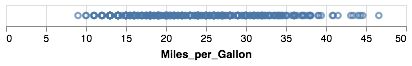

In [4]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon'
)

This is a bit better, but the ``point`` mark is probably not the best for a 1D chart like this.

Let's try the ``tick`` mark instead:

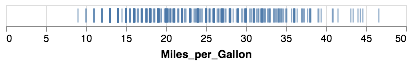

In [5]:
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon'
)

Or we can expand this into a 2D chart by also encoding the y value. We'll return to using ``point`` markers, and put ``Horsepower`` on the y-axis

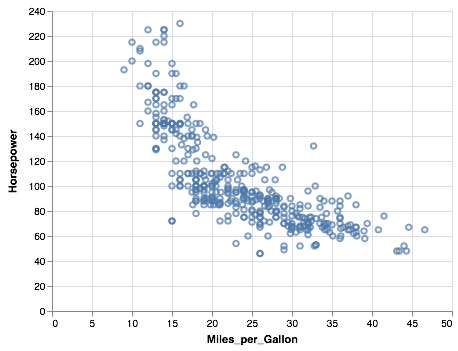

In [6]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower' 
)

Under the hood, Altair generates a Vega-Lite object .  We can view the JSON data using the `to_dict()` method

In [7]:
# Let's extract just one data point so our JSON is not too large
cars1 = cars.iloc[:1] 

alt.Chart(cars1).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower'
).to_dict()

{'$schema': 'https://vega.github.io/schema/vega-lite/v2.4.1.json',
 'config': {'view': {'height': 300, 'width': 400}},
 'data': {'values': [{u'Acceleration': 12.0,
    u'Cylinders': 8,
    u'Displacement': 307.0,
    u'Horsepower': 130.0,
    u'Miles_per_Gallon': 18.0,
    u'Name': u'chevrolet chevelle malibu',
    u'Origin': u'USA',
    u'Weight_in_lbs': 3504,
    u'Year': '1970-01-01'}]},
 'encoding': {'x': {'field': 'Miles_per_Gallon', 'type': 'quantitative'},
  'y': {'field': 'Horsepower', 'type': 'quantitative'}},
 'mark': 'point'}

### Adding Third Dimension: Color

A 2D plot allows us to encode two dimensions of the data. Let's look at using color to encode a third:

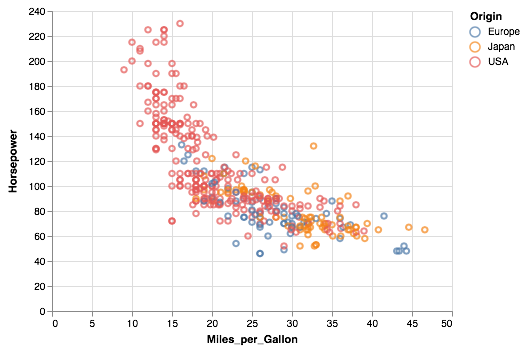

In [8]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
)

Notice that when we use a categorical value for color, Altair automatically chooses an appropriate color map for categorical data.

Let's see what happens when we use a continuous color value:

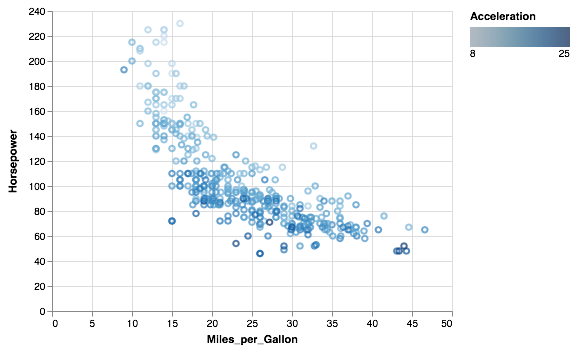

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Acceleration'
)

Here you can see that Altair will give you *smart defaults* for many things. 

## 3. Simple Interactions

One of the nicest features of Altair is the grammar of interaction that it provides.
The simplest kind of interaction is the ability to pan and zoom along charts; Altair contains a shortcut to enable this via the ``interactive()`` method.

Tooltip can be easily added as an encoding channel as well.

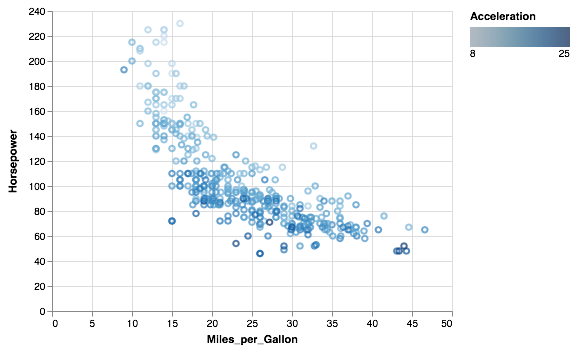

In [10]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Acceleration',
    tooltip='Name' 
).interactive() 

This lets you click and drag, as well as use your computer's scroll/zoom behavior to zoom in and out on the chart.

We'll see other interactions later.

## 4. Data Transformation

### Binning & Aggregation

Let's return quickly to our 1D chart of miles per gallon:

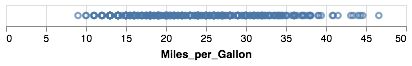

In [11]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
)

Another way we might represent this data is to create a **histogram**: to bin the x data and show the count on the y axis.  

![](figures/histogram.png)

In many plotting libraries this is done with a special method like ``hist()``.  Such command is convenient, but does not provide flexibility to transition to other similar graphics. 

As a grammar, Altair instead provide data transformation like binning and aggregation as primitive building blocks for composing a broad range of graphics by _re-using_ these primitives.  

----

**CONCEPTS**:

- **Binning**: discretize numeric values into a set of bins.

- **Aggregation**: groups an input data and compute descriptive statistics such as counts, sums, and averages

----

To move beyond a simple field name, we use ``alt.X()`` for the x encoding, and we use ``'count()'`` for the y encoding:

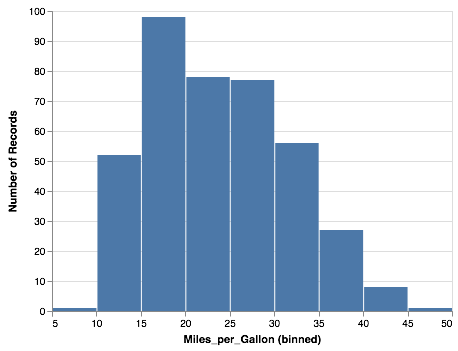

In [12]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y='count()'
)

If we want more control over the bins, we can use ``alt.Bin`` to adjust bin parameters

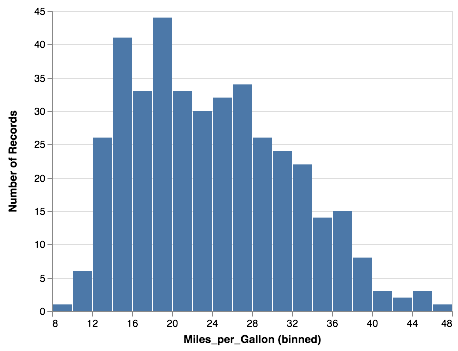

In [13]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()'
)

If we apply another encoding (such as ``color``), the data will be automatically grouped and _stacked_ within each bin:

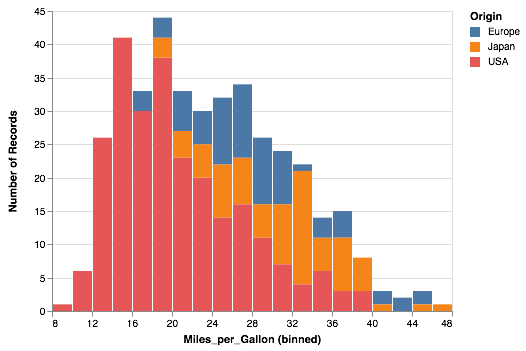

In [14]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin'
)

<br/> If you prefer a separate plot for each category, the ``column`` encoding can help:

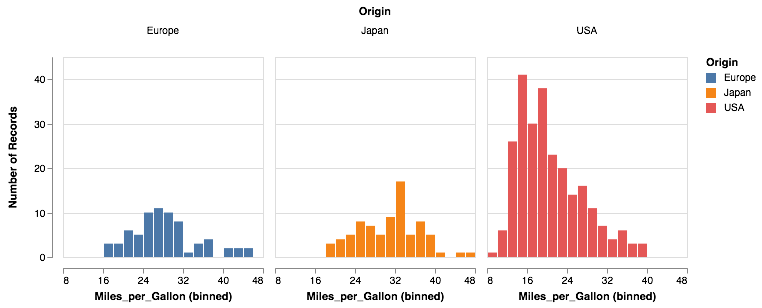

In [15]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin',
    column='Origin'
).properties(width=200, height=200)


As primitive building blocks, we can apply binnning and aggregation for a 2D histogram as well; we can use the ``rect`` mark and visualize the count using the color:

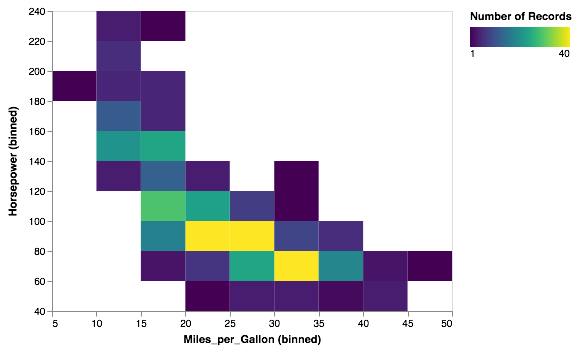

In [16]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y=alt.Y('Horsepower', bin=True),
    color='count()'
)

Aggregations can be more than simple counts; we can also aggregate and compute the mean of a third quantity within each bin

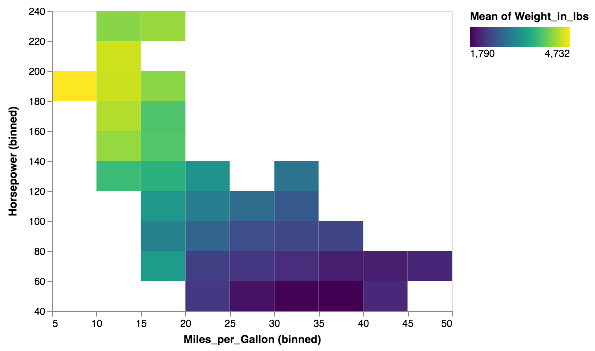

In [17]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y=alt.Y('Horsepower', bin=True),
    color='mean(Weight_in_lbs)'
)

Besides making 1D and 2D histogram, we can also show average values over time.

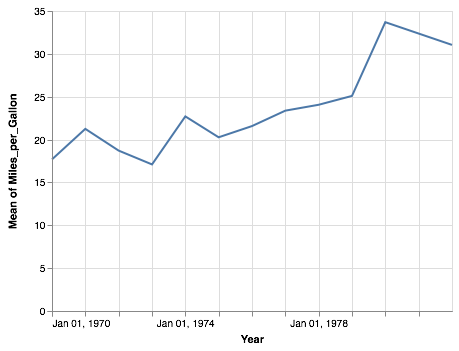

In [18]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)'
)

Adding color produce a multi-series line chart.

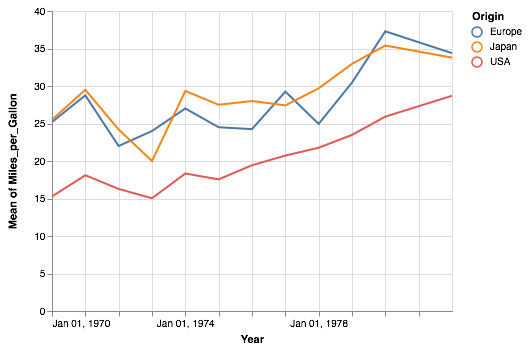

In [19]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
    color='Origin'
)

### Filtering


----

**CONCEPTS**:

- **Filtering**: Include only a subset of the data source in the final visualization

----

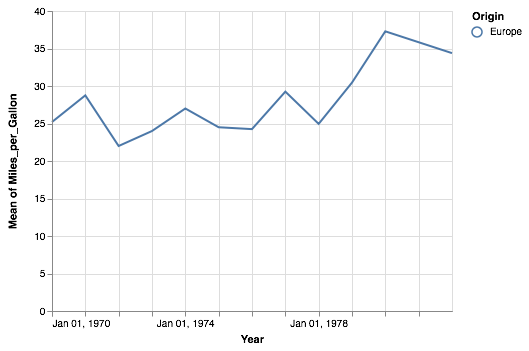

In [20]:
from altair import datum

alt.Chart(cars).transform_filter(
   datum.Origin == 'Europe'
).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
    color='Origin'
)


For more information about these and other data transformations, please see [the "Data Transformations"](https://altair-viz.github.io/user_guide/transform.html) page in the Altair documentation.

## 5. Chart Customization

So far we have learnt about *data*, *mark*, *encoding* mappings and data *transformations*.  These primitives are very useful for quick data exploration. But oftentimes, we will also want to refine our visualization for publication too.

### Mark Properties

All of the `mark_*()` method have mark properties that you can customize

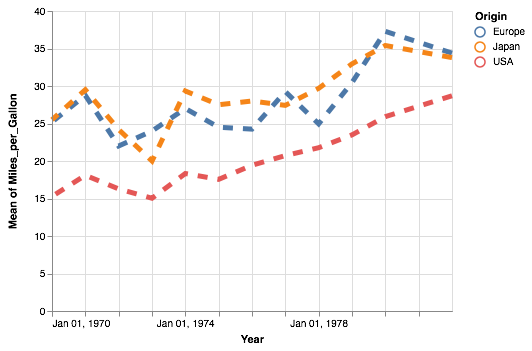

In [21]:
alt.Chart(cars).mark_line(strokeWidth=5, strokeDash=[10,10]).encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
    color='Origin'
)

### Scale, Axis & Legend

These are lower-level building blocks that Altair automatically provide sensible default for you.

----
**CONCEPT**

- **Scale**: A function that transforms a domain of data values (numbers, dates, strings, etc.) to a range of visual values (pixels, colors, sizes).
- **Axis**: A visualization of a positional scale
- **Legend**: A visualization of a non-positional scale

----

Let's try to customize the scale type and color range.

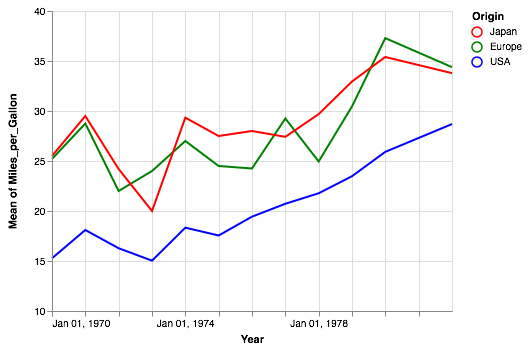

In [22]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', scale=alt.Scale(domain=[10,40])),
    color=alt.Color('Origin', scale=alt.Scale(
      domain=['Japan', 'Europe', 'USA'],range=["red", "green", "blue"]
    ))
)

or use a log scale

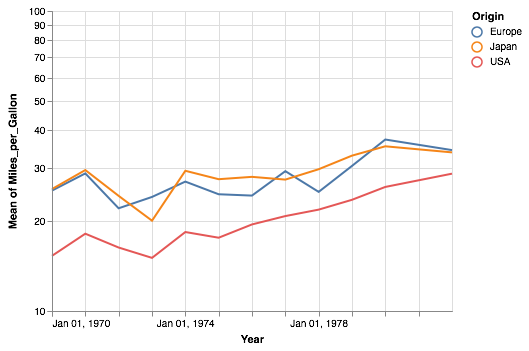

In [23]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', scale=alt.Scale(type="log")),
    color='Origin'
)

or customize title and orient of the axis and legend.

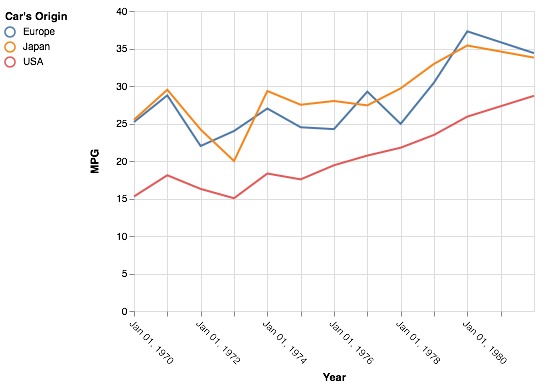

In [24]:
alt.Chart(cars).mark_line().encode(
    x=alt.X('Year', axis=alt.Axis(domain=False, labelAngle=45)),
    y=alt.Y('mean(Miles_per_Gallon)', title='MPG', axis=alt.Axis(domain=False)),
    color=alt.Color('Origin', title="Car's Origin", legend=alt.Legend(orient='left'))
)

## 6. View Composition

So far we have been creating single charts.  In this part, I will now show how we can compose layer and multi-view charts using the view composition operators in Altair.

----

**CONCEPTS**: 

- Layering
- Horizontal and Vertical Concatenation
- Repeated Charts

----

### Layering

From the line chart we have earlier

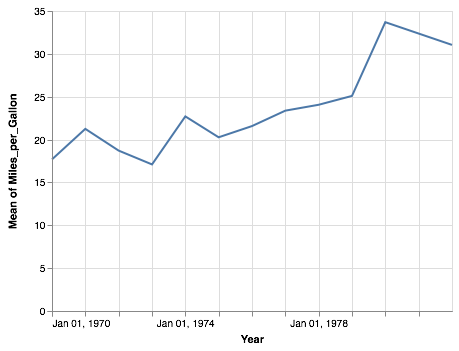

In [25]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
)

Suppose we want to overlay the line with a confidence interval band.

Let's first create a plot showing a confidence interval only first.  We can  ``area`` and use the ``ci0`` and ``ci1`` aggregation functions to plot the confidence interval of the estimate of the mean:

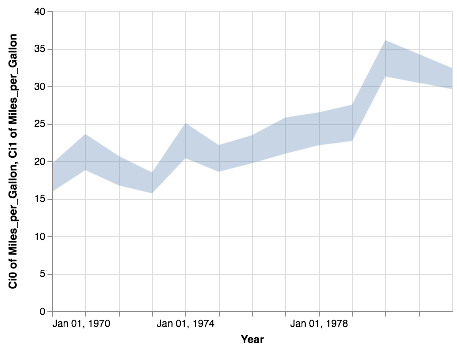

In [26]:
alt.Chart(cars).mark_area(opacity=0.3).encode(
    x='Year',
    y='ci0(Miles_per_Gallon)',
    y2='ci1(Miles_per_Gallon)'
)

<br/> Finally, we can use Altair's layering API to layer a line chart representing the mean on top of the area chart representing the confidence interval:

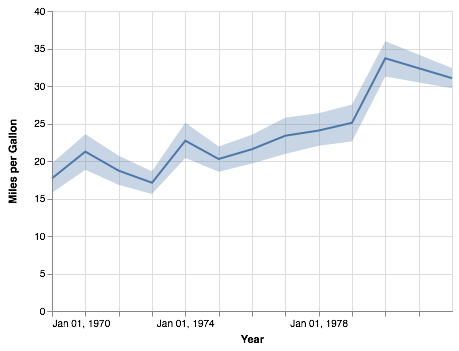

In [27]:
line = alt.Chart(cars).mark_line().encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', axis=alt.Axis(title='Miles per Gallon')),
)

spread = alt.Chart(cars).mark_area(opacity=0.3).encode(
    x='Year',
    y='ci0(Miles_per_Gallon)',
    y2='ci1(Miles_per_Gallon)'
)

line + spread

This is equivalent to using the `alt.layer()` method

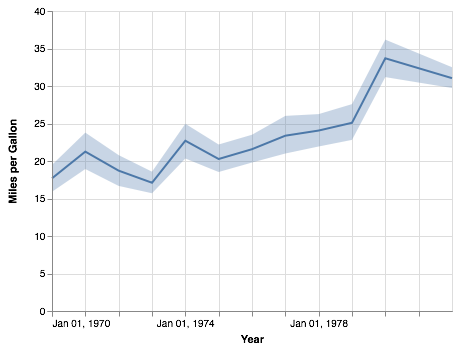

In [28]:
alt.layer(line, spread)

### Concatenation


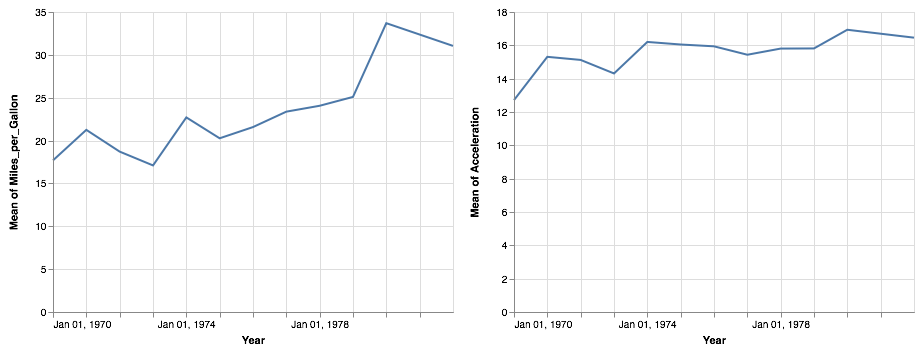

In [29]:
base = alt.Chart(cars).mark_line().encode(
    x='Year'
)

line_mpg = base.encode(y=alt.Y('mean(Miles_per_Gallon)'))
line_acc = base.encode(y=alt.Y('mean(Acceleration)'))

line_mpg | line_acc # or alt.hconcat(line_mpg, line_acc)

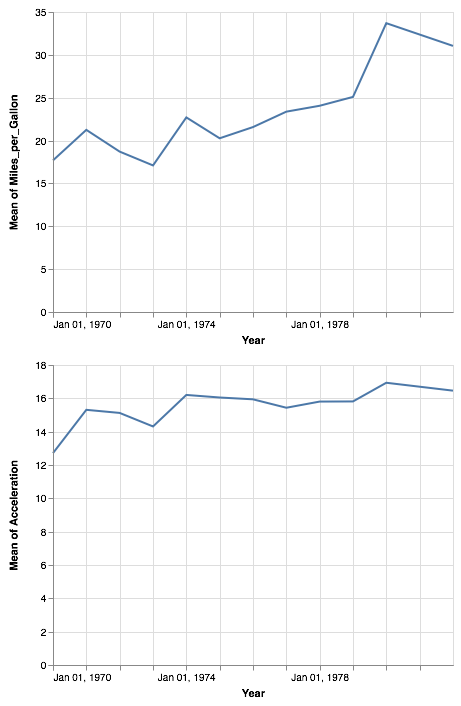

In [30]:
line_mpg & line_acc # or alt.vconcat(line_mpg, line_acc)

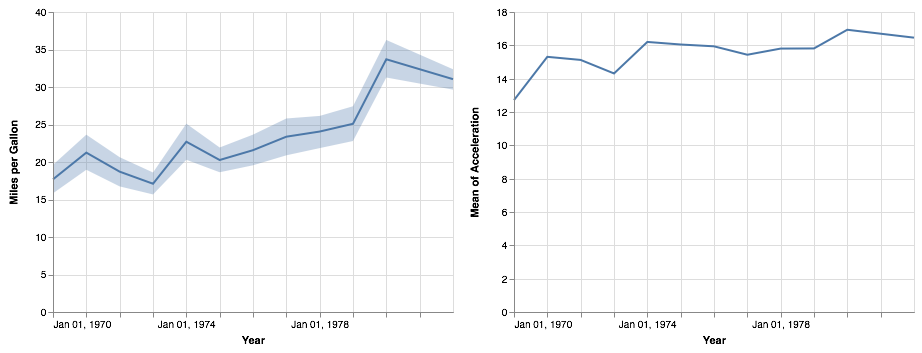

In [31]:
(line + spread) | line_acc

### Repeat

Because it is such a common pattern to horizontally and vertically concatenate charts while changing one encoding, Altair offers a shortcut for this, using the ``repeat()`` operator. 

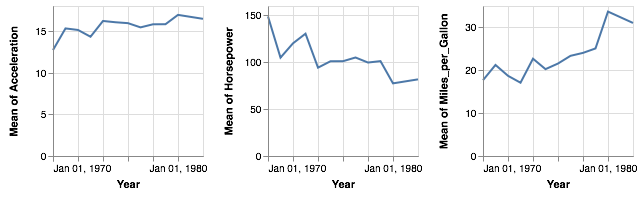

In [32]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y=alt.Y(alt.repeat("column"), aggregate="mean", type='quantitative'),
).properties(
    width=150,
    height=150
).repeat(column=['Acceleration', 'Horsepower', 'Miles_per_Gallon'])

This is especially useful for creating a scatterplot matrix.

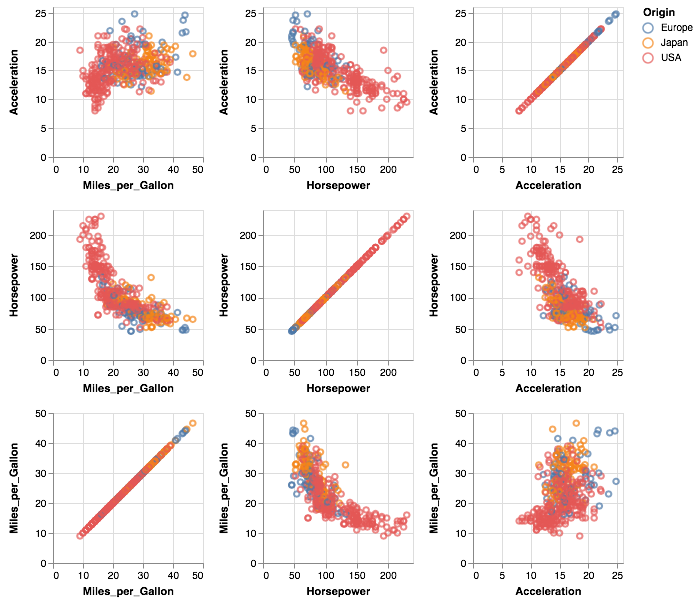

In [33]:
fields = ['Acceleration', 'Horsepower', 'Miles_per_Gallon']

alt.Chart(cars).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin'
).properties(
    width=150,
    height=150
).repeat(
    row=fields,
    column=fields[::-1] # need to invert the order to make the diagonal align
).interactive()

## 7. Interactivity: Selections

Besides `.interactive()`, Altair also offers an advanced way to specify interaction via the selection APIs.

----
**CONCEPT**:

**Selection**: An abstraction that maps user input (e.g., mouse clicks) into data queries. These data queries can then subsequently be used to 

  1) drive _conditional encoding_ rules 

  2) _determine scale domains_

  3) _filter data points_


  There are also currently three selection types:

    - `single` – to select a single discrete data value on click. 
    - `multi` – to select multiple discrete data value; the first value is selected on click and additional values toggled on shift-click. 
    - `interval` – to select a continuous range of data values on drag.

----

### Conditional Encoding with Different Selection Types

We will now try to use different types of selections with conditional encoding.


#### Interval Selection

To add selection behavior to a chart, we create the selection object and add it to the chart's properties:

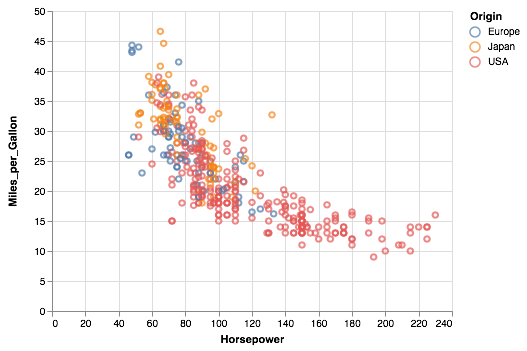

In [34]:
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin'
).properties(
    selection=interval
)

Currently this selection doesn't actually do anything, but we can change that by conditioning the color on this selection:

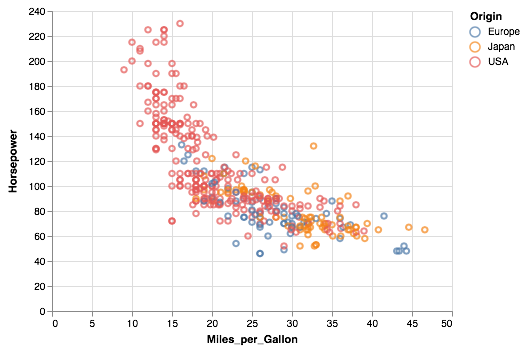

In [35]:
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

The ``alt.condition`` function takes three arguments: a selection object, a value to be applied to points within the selection, and a value to be applied to points outside the selection.
Here we use ``alt.value('lightgray')`` to make certain that the color is treated as an actual color, rather than the name of a data column.

We can also restrict the brush to be only on one direction:

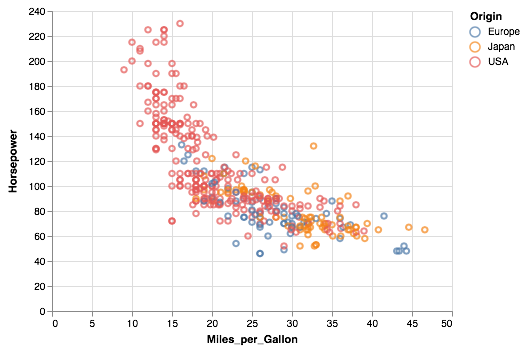

In [36]:
interval = alt.selection_interval(encodings=['x'])

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)


#### Single Selection

The ``alt.selection_single()`` function allows the user to click on single chart objects to select them, one at a time.  Note that here we use ``mark_circle()`` instead of ``mark_point()`` so it's easier to click.

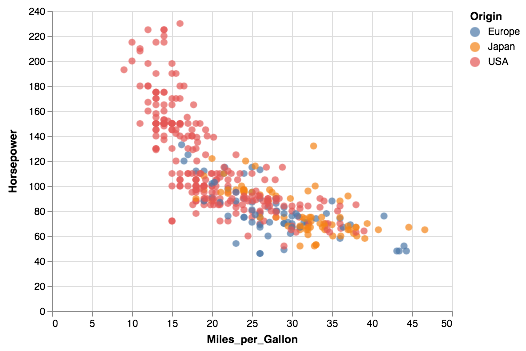

In [37]:
sel = alt.selection_single()

alt.Chart(cars).mark_circle(size=50).encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(sel, 'Origin', alt.value('lightgray'))
).properties(
    selection=sel
)

#### Customizing Single Selection

The single selection allows other behavior as well; for example, we can set ``nearest=True`` and ``on='mouseover'`` to update the highlight to the nearest point as we move the mouse:

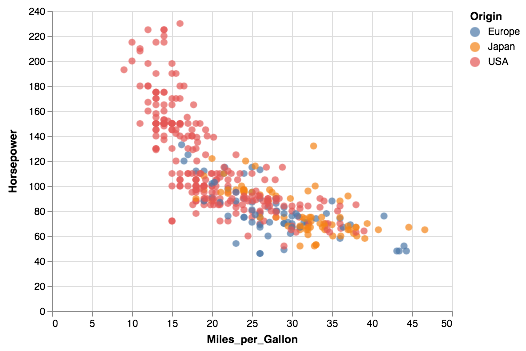

In [38]:
sel = alt.selection_single(on='mouseover', nearest=True)

alt.Chart(cars).mark_circle(size=50).encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(sel, 'Origin', alt.value('lightgray'))
).properties(
    selection=sel
)

#### Multi Selection

The ``alt.selection_multi()`` function is quite similar to the ``single`` function, except it lets multiple points be selected at once, while holding the shift key.  Note that options like ``on`` and ``nearest`` also work for multi selections:

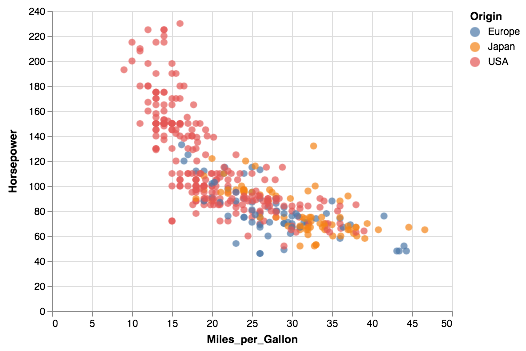

In [39]:
sel = alt.selection_multi(on='mouseover', nearest=True)

alt.Chart(cars).mark_circle(size=50).encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(sel, 'Origin', alt.value('lightgray'))
).properties(
    selection=sel
)


#### Coordinated Multi-View Charts

The nice thing about this selection API is that it *automatically* applies across any compound charts; for example, here we can horizontally concatenate two charts with interval selections, and since they both have the same selection they both respond appropriately:

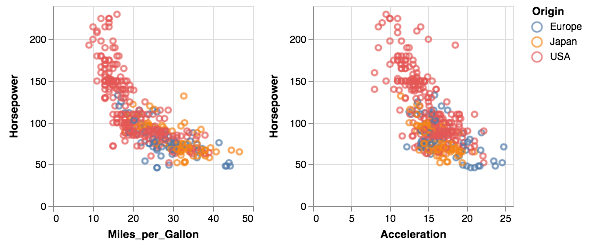

In [40]:
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval,
    width=200,
    height=200
)

base.encode(x='Miles_per_Gallon') | base.encode(x='Acceleration')

### Using Selection to Filter 

We can also uses selection to filter data. 

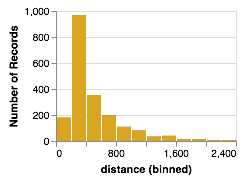

In [41]:
from vega_datasets import data

flights = alt.UrlData(data.flights_2k.url,
                      format={'parse': {'date': 'date'}})

brush = alt.selection(type='interval', encodings=['x'])

base = alt.Chart().mark_bar().encode(
    x=alt.X('distance', type='quantitative', bin=alt.Bin(maxbins=20)),
    y='count()'
).properties(
    width=180,
    height=130
)

# blue background with selection
background = base.properties(
    selection=brush
)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('goldenrod')
).transform_filter(
    brush.ref()
)

alt.layer(
    background, highlight,
    data=flights
)


We can "repeat" the x-axis and make a coordinated histogram

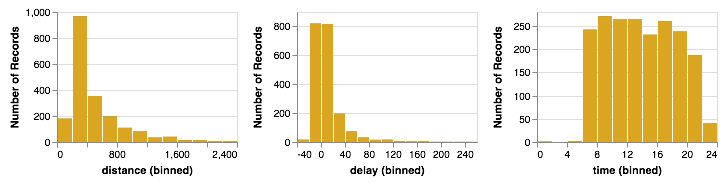

In [42]:
flights = alt.UrlData(data.flights_2k.url,
                      format={'parse': {'date': 'date'}})

brush = alt.selection(type='interval', encodings=['x'])

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart().mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=20)),
    y='count()'
).properties(
    width=180,
    height=130
)

# blue background with selection
background = base.properties(
    selection=brush
)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('goldenrod')
).transform_filter(
    brush.ref()
)

# layer the two charts & repeat
alt.layer(
    background, highlight,
    data=flights
).transform_calculate(
    "time", "hours(datum.date)"
).repeat(
    column=["distance", "delay", "time"]
)

### Using Selection to Parameterize Scale

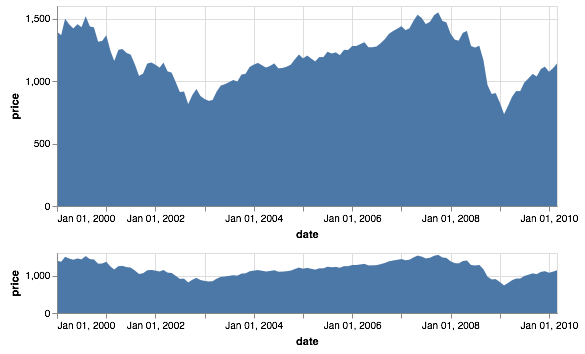

In [43]:
import altair as alt
from vega_datasets import data
sp500 = data.sp500.url

brush = alt.selection(type='interval', encodings=['x'])

upper = alt.Chart(sp500).mark_area().encode(
    alt.X('date:T', scale={'domain': brush.ref()}),
    y='price:Q'
).properties(
    width=500,
    height=200
)

lower = upper.properties(
    selection=brush,
    height=60
)

alt.vconcat(upper, lower)

In [ ]:
## Learning more?

https://altair-viz.github.io 